<a href="https://colab.research.google.com/github/Ashfaq-Hussain7/ML_Algorithms/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Logisitc Regression

In [ ]:
import numpy as np

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y_true, y_pred):
        """Compute the binary cross-entropy loss."""
        m = y_true.shape[0]
        return (-1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """Train the logistic regression model using gradient descent."""
        m, n = X.shape  # Number of samples and features
        self.weights = np.zeros(n)  # Initialize weights
        self.bias = 0  # Initialize bias

        for epoch in range(self.epochs):
            # Compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost for monitoring
            if epoch % 100 == 0:
                cost = self.compute_cost(y, y_pred)
                print(f"Epoch {epoch}, Cost: {cost:.4f}")

    def predict(self, X):
        """Make predictions using the trained model."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)  # Convert probabilities to class labels

In [ ]:
# Example Usage:
if __name__ == "__main__":
    # Generate synthetic dataset
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_classification

    X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train logistic regression model
    model = LogisticRegression(learning_rate=0.1, epochs=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = np.mean(y_pred == y_test) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.3708
Epoch 200, Cost: 0.3562
Epoch 300, Cost: 0.3529
Epoch 400, Cost: 0.3519
Epoch 500, Cost: 0.3516
Epoch 600, Cost: 0.3515
Epoch 700, Cost: 0.3514
Epoch 800, Cost: 0.3514
Epoch 900, Cost: 0.3514
Test Accuracy: 88.00%


# **PARALLEL COMP LAB**

**Question 1**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset directly from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Train images: {X_train.shape}, Train labels: {y_train.shape}")
print(f"Test images: {X_test.shape}, Test labels: {y_test.shape}")


Train images: (60000, 28, 28), Train labels: (60000,)
Test images: (10000, 28, 28), Test labels: (10000,)


In [ ]:
# Normalize pixel values (0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# Reshape to 2D (784 features) for Logistic Regression
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:

# Split training data into train and validation (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (48000, 784) (48000, 10)
Validation set shape: (12000, 784) (12000, 10)
Test set shape: (10000, 784) (10000, 10)


**Question** 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("✅ Data loaded and preprocessed!")
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

✅ Data loaded and preprocessed!
Train shape: (48000, 784), Validation shape: (12000, 784), Test shape: (10000, 784)


In [ ]:
# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluate Performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_val,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9223
Precision: 0.9221
Recall: 0.9223
F1 Score: 0.9222

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.89      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [ ]:
# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 50, 100]}

# Perform Grid Search CV
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
                           param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate Best Model
y_pred_best = best_model.predict(X_val)
accuracy_best = accuracy_score(y_val, y_pred_best)
print(f"Improved Accuracy: {accuracy_best:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Hyperparameters: {'C': 0.1}
Improved Accuracy: 0.9242


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


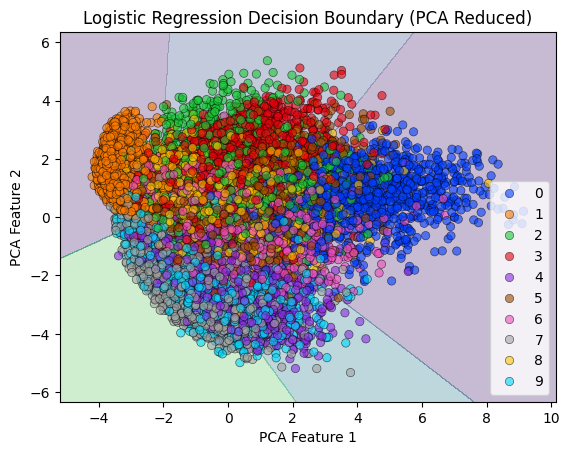

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce data to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_val_2D = pca.transform(X_val)

# Train logistic regression on 2D data
model_2D = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_2D.fit(X_train_2D, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="bright", alpha=0.6, edgecolor="k")
    plt.title("Logistic Regression Decision Boundary (PCA Reduced)")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.show()

plot_decision_boundary(X_val_2D, y_val,model_2D)

**Question 3**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset (ensure you upload it or provide the correct path)
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

# Display dataset overview
print(df.head())
print(df.info())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:

# Check data types
print(df.info())

# Identify non-numeric columns
print(df.select_dtypes(include='object').head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(5), 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())



Categorical Columns: Index(['Branch', 'City'], dtype='object')
   Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0       0     2              0       0             3       74.69         7   
1       2     1              1       0             0       15.28         5   
2       0     2              1       1             4       46.33         7   
3       0     2              0       1             3       58.22         8   
4       0     2              1       1             5       86.31         7   

    Tax 5%     Total  Payment    cogs  gross margin percentage  gross income  \
0  26.1415  548.9715        2  522.83                 4.761905       26.1415   
1   3.8200   80.2200        0   76.40                 4.761905        3.8200   
2  16.2155  340.5255        1  324.31                 4.761905       16.2155   
3  23.2880  489.0480        2  465.76                 4.761905       23.2880   
4  30.2085  634.3785        2  604.17                 4.761905      

In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(7)
m

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print(scaled_data[:5])


[[-1.20897001e+00  1.21017372e+00 -9.98001996e-01 -9.98001996e-01
   3.19616615e-01  7.18160143e-01  5.09930204e-01  9.19606849e-01
   9.19606849e-01  1.20352798e+00  9.19606849e-01  0.00000000e+00
   9.19606849e-01  1.23844341e+00]
 [ 1.23833770e+00 -9.75946548e-03  1.00200200e+00 -9.98001996e-01
  -1.43010938e+00 -1.52530319e+00 -1.74539868e-01 -9.87729558e-01
  -9.87729558e-01 -1.20593745e+00 -9.87729558e-01  0.00000000e+00
  -9.87729558e-01  1.52952681e+00]
 [-1.20897001e+00  1.21017372e+00  1.00200200e+00  1.00200200e+00
   9.02858613e-01 -3.52781117e-01  5.09930204e-01  7.14460541e-02
   7.14460541e-02 -1.20473272e-03  7.14460541e-02  0.00000000e+00
   7.14460541e-02  2.48759870e-01]
 [-1.20897001e+00  1.21017372e+00 -9.98001996e-01  1.00200200e+00
   3.19616615e-01  9.62136497e-02  8.52165240e-01  6.75779846e-01
   6.75779846e-01  1.20352798e+00  6.75779846e-01  0.00000000e+00
   6.75779846e-01  8.30926661e-01]
 [-1.20897001e+00  1.21017372e+00  1.00200200e+00  1.00200200e+00
  

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Show cluster distribution
print(df['Cluster'].value_counts())


Cluster
3    241
0    240
4    211
2    162
1    146
Name: count, dtype: int64


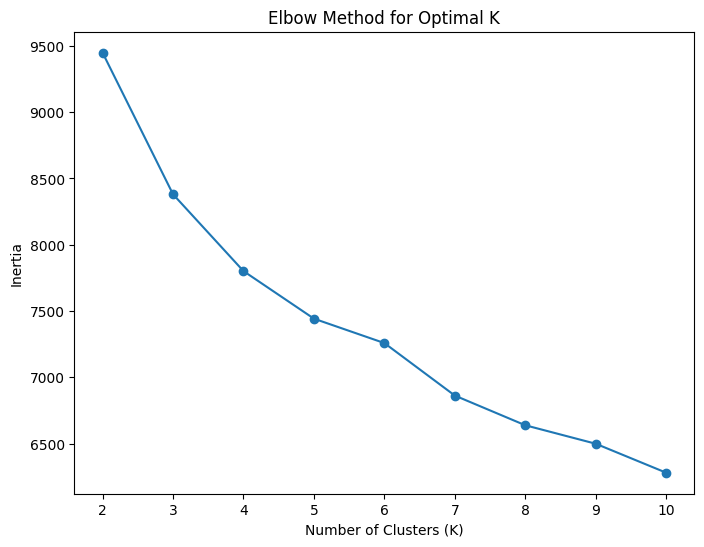

In [ ]:
# Determine optimal K using the Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


           Branch      City  Customer type    Gender  Product line  \
Cluster                                                              
0        0.000000  2.000000       0.529167  0.537500      2.475000   
1        1.054795  1.000000       0.486301  0.479452      2.431507   
2        1.518519  0.518519       0.580247  0.358025      2.092593   
3        1.464730  0.464730       0.443983  0.597510      2.443983   
4        1.113744  0.881517       0.473934  0.464455      2.725118   

         Unit price  Quantity     Tax 5%       Total   Payment        cogs  \
Cluster                                                                      
0         45.850208  4.450000   8.799119  184.781494  1.016667  175.982375   
1         84.828219  8.869863  37.303144  783.366021  0.883562  746.062877   
2         29.223272  7.117284  10.190731  214.005361  0.820988  203.814630   
3         52.599585  2.369295   5.907071  124.048481  1.041494  118.141411   
4         70.485735  6.744076  22.496773 

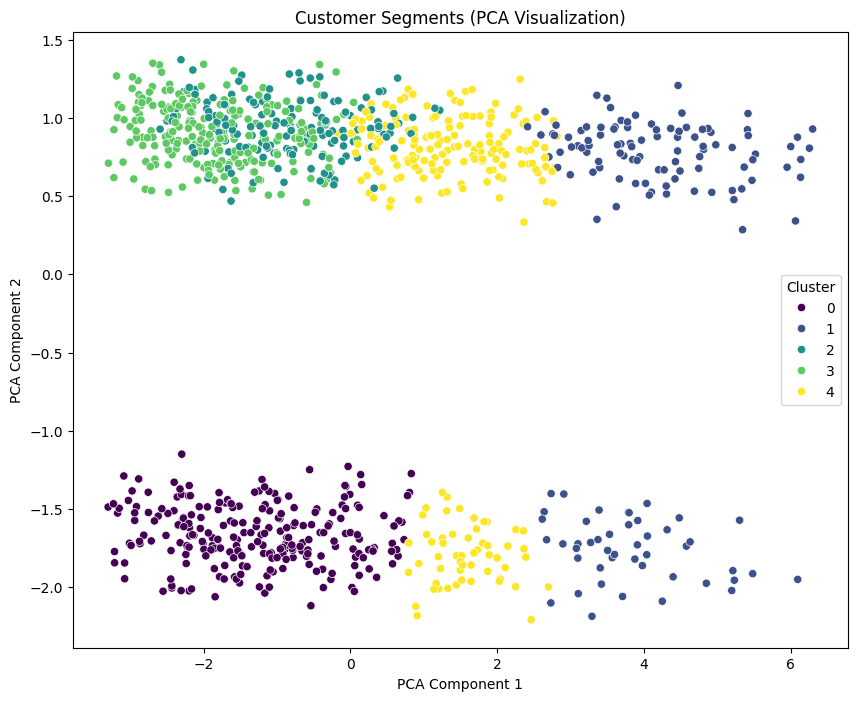

In [ ]:
# Reduce dimensions using PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**Question 4**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Create DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display dataset overview
print(df.head())
print(df.info())

# Split into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

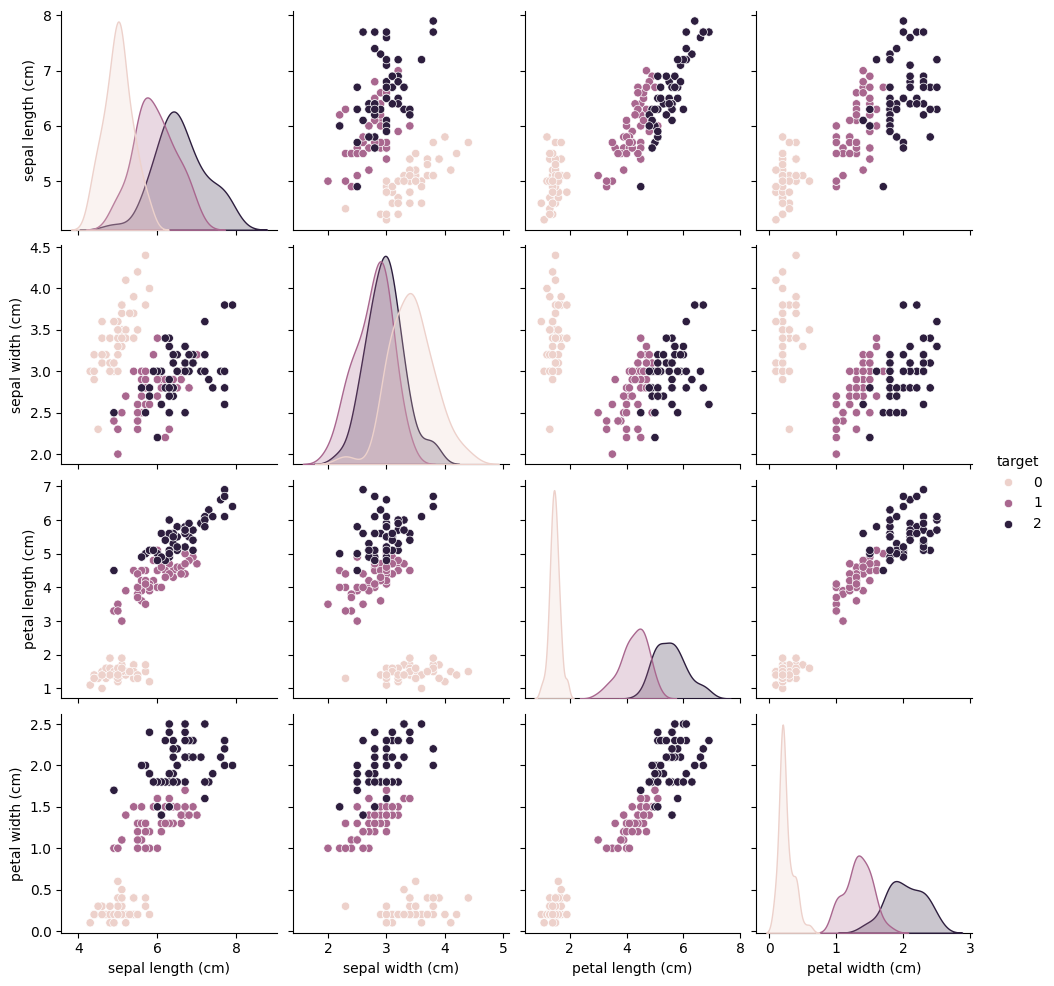

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


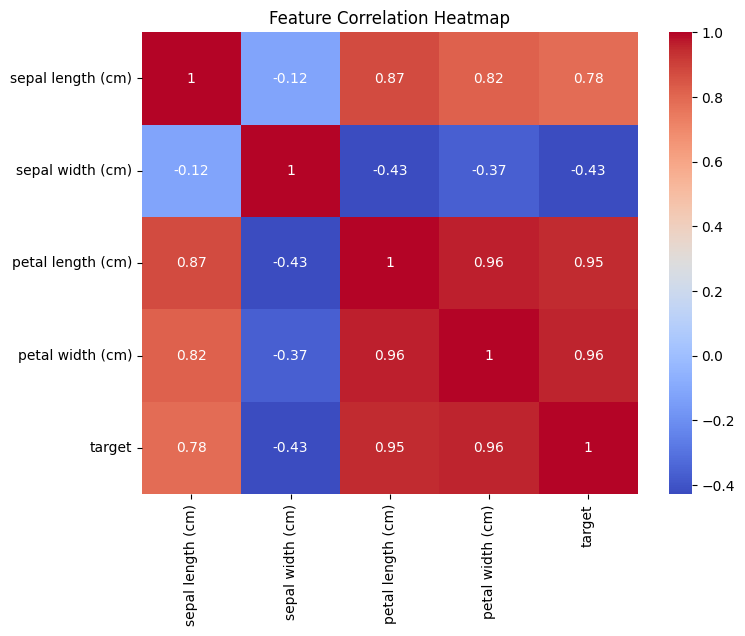

In [ ]:
# Check dataset distribution
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

# Summary statistics
print(df.describe())

# Check for correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 2 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Display selected features and scores
print("Feature Scores:", selector.scores_)
print("Selected Features Shape:", X_selected.shape)


Feature Scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
Selected Features Shape: (150, 2)


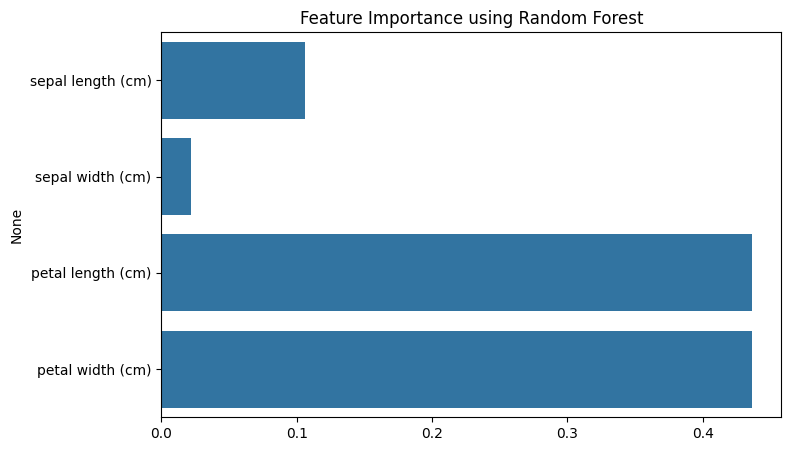

Random Forest Selected Features: ['petal width (cm)', 'petal length (cm)']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title('Feature Importance using Random Forest')
plt.show()

# Select top 2 important features
important_indices = np.argsort(rf.feature_importances_)[-2:]
X_rf_selected = X.iloc[:, important_indices]
print("Random Forest Selected Features:", X_rf_selected.columns.tolist())


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Use SVM as the base model for RFE
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=2)
X_rfe_selected = rfe.fit_transform(X, y)

# Display selected features
print("Selected Features by RFE:", X.columns[rfe.support_])


Selected Features by RFE: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Function to evaluate model
def evaluate_model(X_train, X_test, y_train, y_test):
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [ ]:
# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("📊 Evaluation on Original Dataset (All Features):")
evaluate_model(X_train, X_test, y_train, y_test)


📊 Evaluation on Original Dataset (All Features):
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Split dataset with SelectKBest features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print("📊 Evaluation with SelectKBest Features:")
evaluate_model(X_train, X_test, y_train, y_test)


📊 Evaluation with SelectKBest Features:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Split dataset with Random Forest features
X_train, X_test, y_train, y_test = train_test_split(X_rf_selected, y, test_size=0.3, random_state=42)

print("📊 Evaluation with Random Forest Features:")
evaluate_model(X_train, X_test, y_train, y_test)


📊 Evaluation with Random Forest Features:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Split dataset with RFE features
X_train, X_test, y_train, y_test = train_test_split(X_rfe_selected, y, test_size=0.3, random_state=42)

print("📊 Evaluation with RFE Features:")
evaluate_model(X_train, X_test, y_train, y_test)


📊 Evaluation with RFE Features:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Question **5**

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("/content/Groceries_dataset.csv")

# Display dataset overview
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [4]:
print(df.info())  # Check column names & data types
print(df.nunique())  # Unique values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None
Member_number      3898
Date                728
itemDescription     167
dtype: int64


In [5]:
# Group items by transaction (Member_number)
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list).tolist()

print(transactions[:5])  # View first few transactions


[['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack'], ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns'], ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables'], ['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns'], ['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'whole milk', 'other vegetables', 'hygiene articles', 'whole milk', 'whole milk', 'frozen fish', 'red/blush wine', 'chocolate', 'shopping bags', 'dish cleaner', 'packaged fruit/vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags', 'chocolate', 'pastry']]


In [6]:
from mlxtend.preprocessing import TransactionEncoder

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Display transformed dataset
print(df_encoded.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [7]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with minimum support of 0.01
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())


    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)


In [8]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display important columns
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                            antecedents         consequents  \
0                                            (UHT-milk)        (whole milk)   
1                                                (beef)        (whole milk)   
2                                        (bottled beer)        (whole milk)   
3                                       (bottled water)        (whole milk)   
4                                         (brown bread)        (whole milk)   
...                                                 ...                 ...   
1112  (yogurt, rolls/buns, other vegetables, shoppin...        (whole milk)   
1113  (whole milk, yogurt, other vegetables, shoppin...        (rolls/buns)   
1114    (whole milk, yogurt, rolls/buns, shopping bags)  (other vegetables)   
1115       (soda, yogurt, rolls/buns, other vegetables)        (whole milk)   
1116             (soda, yogurt, rolls/buns, whole milk)  (other vegetables)   

       support  confidence      lift  
0     0.0405

In [9]:
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]

# Display strong rules
print(strong_rules)


                                            antecedents         consequents  \
36                                             (liquor)        (whole milk)   
39                                            (mustard)        (whole milk)   
70                                  (sausage, UHT-milk)  (other vegetables)   
74                                   (yogurt, UHT-milk)  (other vegetables)   
81                                 (bottled beer, beef)        (whole milk)   
...                                                 ...                 ...   
1105                 (soda, yogurt, whipped/sour cream)        (whole milk)   
1106  (bottled water, yogurt, rolls/buns, other vege...        (whole milk)   
1109    (sausage, yogurt, rolls/buns, other vegetables)        (whole milk)   
1112  (yogurt, rolls/buns, other vegetables, shoppin...        (whole milk)   
1115       (soda, yogurt, rolls/buns, other vegetables)        (whole milk)   

      antecedent support  consequent support   supp

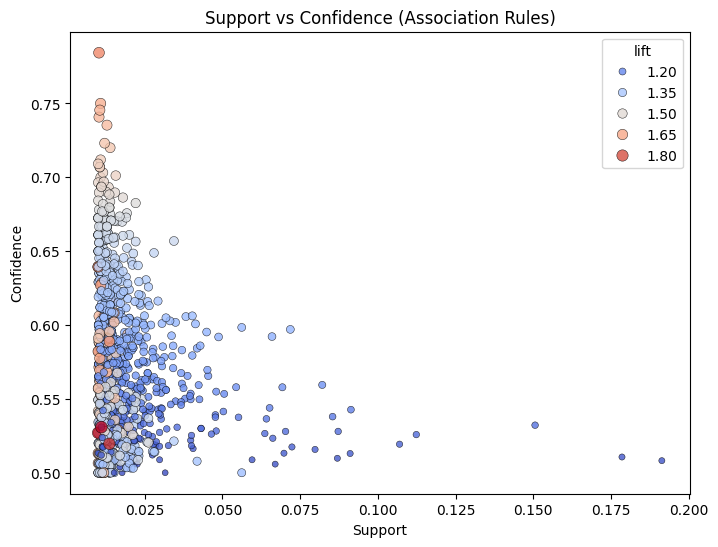

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Support vs Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules['support'], y=rules['confidence'], size=rules['lift'], hue=rules['lift'], palette="coolwarm", edgecolors="k", alpha=0.8)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (Association Rules)")
plt.show()


**Question 6**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [2]:
# Load the dataset
ratings = pd.read_csv("/content/ratings_small.csv")
print("Dataset Loaded Successfully")
print(ratings.head())

Dataset Loaded Successfully
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [3]:
# Step 1: Data Exploration
print("Dataset Information:")
print(ratings.info())
print("Summary Statistics:")
print(ratings.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
Summary Statistics:
              userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  1.110422e+09
75%       520.000000    5418.000000       4.000000  1.296192e+09
max       671.000000  163949

In [4]:
# Step 2: User-Item Interaction Matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.fillna(0, inplace=True)


In [5]:
# Step 3: User-Based Collaborative Filtering
user_similarity = cosine_similarity(user_item_matrix)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def get_user_based_recommendations(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return "User ID not found"
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[:5]
    recommended_movies = user_item_matrix.loc[similar_users].mean().sort_values(ascending=False)
    watched_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
    return recommended_movies.drop(watched_movies).head(num_recommendations)


In [6]:
# Step 4: Item-Based Collaborative Filtering
item_similarity = cosine_similarity(user_item_matrix.T)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def get_item_based_recommendations(movie_id, num_recommendations=5):
    if movie_id not in item_similarity_df.index:
        return "Movie ID not found"
    return item_similarity_df[movie_id].sort_values(ascending=False).head(num_recommendations)


In [7]:
# Example Usage
print("User-Based Recommendations for User 1:")
print(get_user_based_recommendations(1))


User-Based Recommendations for User 1:
movieId
4085     2.0
256      1.6
69       1.0
36527    1.0
318      1.0
dtype: float64


In [8]:
print("Item-Based Recommendations for Movie 1:")
print(get_item_based_recommendations(1))

Item-Based Recommendations for Movie 1:
movieId
3114    0.594710
260     0.576188
356     0.564534
780     0.562946
1265    0.548023
Name: 1, dtype: float64


Another method to solve problem 6

In [10]:
movie_data_path = '/content/ratings_small.csv'
movie_data = pd.read_csv(movie_data_path)
movie_data.drop('timestamp', axis=1, inplace=True)
unique_movies = movie_data['movieId'].unique()
uniique_users = movie_data['userId'].unique()

print(movie_data.head())
print(f'SHAPE : {movie_data.shape}')
print(f'DESCRIPTION : \n{movie_data.describe()}')
print(f'INFO : \n{movie_data.info()}')
print(f'Total Unique Movies : {len(unique_movies)}')
print(f'Total Unique Users : {len(uniique_users)}')

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (100004, 3)
DESCRIPTION : 
              userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usa

In [11]:
active_users = movie_data['userId'].value_counts().head(1000).index
popular_movies = movie_data['movieId'].value_counts().head(1000).index

subset_data = movie_data[movie_data['userId'].isin(active_users) & movie_data['movieId'].isin(popular_movies)]
print(subset_data.head())
print(f'SHAPE : {subset_data.shape}')

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (62397, 3)


In [12]:
user_movie_matrix = subset_data.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix.fillna(0, inplace=True)
print(user_movie_matrix.head())

movieId  1       2       3       5       6       7       10      11      \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
5           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   

movieId  14      16      ...  106920  109374  109487  111759  112552  112852  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_similarity_matrix = cosine_similarity(user_movie_matrix)
np.fill_diagonal(user_similarity_matrix, 0)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)
print(user_similarity_df.head())

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       0.000000  0.000000  0.000000  0.085142  0.016905  0.000000  0.085997   
2       0.000000  0.000000  0.146985  0.143051  0.109724  0.000000  0.229968   
3       0.000000  0.146985  0.000000  0.104785  0.171020  0.069457  0.178091   
4       0.085142  0.143051  0.104785  0.000000  0.150117  0.092800  0.368138   
5       0.016905  0.109724  0.171020  0.150117  0.000000  0.065360  0.098811   

userId       8         9         10   ...       662       663       664  \
userId                                ...                                 
1       0.000000  0.013781  0.000000  ...  0.000000  0.000000  0.018491   
2       0.123408  0.128084  0.056379  ...  0.511752  0.122564  0.104607   
3       0.277715  0.162022  0.126357  ...  0.184262  0.132724  0.252653   
4       0.226033  0.037311  0.194262  ...  0.133033  0.099404  0

In [14]:
print(user_similarity_df.index.max())

random_user = np.random.choice(user_movie_matrix.index)
print(random_user)

671
650


In [15]:
def get_top_similar_users(userId, user_similarity_df, threshold = 0, n =10):
    user_similarity_scores = user_similarity_df.iloc[userId, :]
    if threshold > 0:
        similar_users = user_similarity_scores[user_similarity_scores > threshold].sort_values(ascending=False). head(n)
    else:
        similar_users = user_similarity_scores.sort_values(ascending=False).head(n)
    return similar_users

In [16]:
similar_users = get_top_similar_users(random_user, user_similarity_df, threshold=0, n=10)
print(similar_users)
type(similar_users)
similar_users.index.to_list()

userId
314    0.293643
244    0.275662
271    0.275292
631    0.274710
352    0.273013
643    0.267966
178    0.265025
218    0.263060
448    0.259939
10     0.256065
Name: 651, dtype: float64


[314, 244, 271, 631, 352, 643, 178, 218, 448, 10]

In [17]:
similar_user_ratings = movie_data[movie_data['userId'].isin(similar_users.index.to_list())]
print(similar_user_ratings.head())

     userId  movieId  rating
744      10       50     5.0
745      10      152     4.0
746      10      318     4.0
747      10      344     3.0
748      10      345     4.0


In [27]:
# Candidate scoring:
# Add up ratings for each item, weighted by user similarity
from collections import defaultdict
scores=defaultdict(float)
for index, similar_user_rating in similar_user_ratings.iterrows():
    movie_id = similar_user_rating['movieId']
    user_rating = similar_user_rating['rating']
    user_id = similar_user_rating['userId']
    user_similarity_score = similar_users[int(user_id)]
    scores[int(movie_id)] += (user_rating / 5.0) * user_similarity_score

In [28]:
movie_data.loc[movie_data['userId'] == random_user].sort_values(by='rating', ascending=False).head(10)

,userId,movieId,rating
97087,650,11,5.0
97094,650,62,5.0
97091,650,36,5.0
97111,650,780,5.0
97097,650,86,5.0
97100,650,95,4.0
97104,650,191,4.0
97107,650,694,4.0
97105,650,494,4.0
97098,650,89,4.0


In [29]:
watched = {}
for index, row in movie_data.loc[movie_data['userId'] == random_user].iterrows():
    watched[row['movieId']] = row['rating']

In [30]:
from operator import itemgetter

recommendations = {}
pos = 0

# Ensure 'scores' is defined and contains movie scores
if 'scores' not in locals():
    print("Error: 'scores' is not defined. Make sure you have computed the similarity scores before running this code.")

else:
    for movie, score in sorted(scores.items(), key=itemgetter(1), reverse=True):
        if movie not in watched:  # Ensure 'watched' is defined
            recommendations[movie] = score
            pos += 1
        if pos >= 10:
            break

    for recommendation, score in recommendations.items():
        print(f"Movie : {recommendation} , Score : {score}")


Movie : 1196 , Score : 2.5993263376430207
Movie : 318 , Score : 2.2580234756760587
Movie : 1198 , Score : 2.22281084083405
Movie : 260 , Score : 2.120987625605631
Movie : 2571 , Score : 1.5935899131817146
Movie : 593 , Score : 1.4403871303158675
Movie : 1210 , Score : 1.253240465083258
Movie : 1197 , Score : 1.121820283775823
Movie : 58559 , Score : 1.082983328332805
Movie : 1036 , Score : 1.0158609313628353


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the data
data_path = "/content/ratings_small.csv"
movie_data = pd.read_csv(data_path)

# Drop the timestamp column
movie_data.drop("timestamp", axis=1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Create a user-item matrix for training
train_user_item_matrix = train_data.pivot(index="userId", columns="movieId", values="rating").fillna(0)

# Calculate user similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_matrix = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Generate recommendations for users in the test set
def recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10):
    if user_id not in user_similarity_df.index:
        return []  # No recommendations for users not in the training set
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index
    scores = train_user_item_matrix.loc[similar_users].sum(axis=0)
    scores = scores.sort_values(ascending=False)
    recommended_movies = scores.index[:top_n]
    return recommended_movies

# Evaluate the recommendations
precision_list = []
recall_list = []
f1_list = []

for user_id in test_data["userId"].unique():
    # Ground truth: Movies the user interacted with in the test set
    ground_truth = test_data[test_data["userId"] == user_id]["movieId"].tolist()

    # Predicted: Top-N recommended movies
    if user_id in train_user_item_matrix.index:
        recommendations = recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10)
    else:
        recommendations = []  # No recommendations for users not in the training set

    # Calculate precision, recall, and F1-score for this user
    if len(ground_truth) > 0:  # Avoid division by zero
        true_positives = len(set(recommendations) & set(ground_truth))
        precision = true_positives / len(recommendations) if len(recommendations) > 0 else 0
        recall = true_positives / len(ground_truth)
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Calculate average metrics across all users
average_precision = sum(precision_list) / len(precision_list) if len(precision_list) > 0 else 0
average_recall = sum(recall_list) / len(recall_list) if len(recall_list) > 0 else 0
average_f1 = sum(f1_list) / len(f1_list) if len(f1_list) > 0 else 0

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-score: {average_f1:.4f}")

Average Precision: 0.0811
Average Recall: 0.0481
Average F1-score: 0.0492


In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the data
data_path = "/content/ratings_small.csv"
movie_data = pd.read_csv(data_path)

# Drop the timestamp column
movie_data.drop("timestamp", axis=1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Create an item-user matrix for training
train_item_user_matrix = train_data.pivot(index="movieId", columns="userId", values="rating").fillna(0)

# Calculate item similarity using cosine similarity
item_similarity_matrix = cosine_similarity(train_item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=train_item_user_matrix.index, columns=train_item_user_matrix.index)

# Predict ratings for a user
def predict_ratings(user_id, train_item_user_matrix, item_similarity_df, top_n=10):
    if user_id not in train_item_user_matrix.columns:
        return []  # No recommendations for users not in the training set

    user_ratings = train_item_user_matrix[user_id]

    # Compute scores for items
    scores = item_similarity_df.dot(user_ratings) / np.abs(item_similarity_df).sum(axis=1)
    scores = pd.Series(scores, index=train_item_user_matrix.index)

    # Exclude items the user has already rated
    rated_items = user_ratings[user_ratings > 0].index
    scores = scores.drop(index=rated_items)

    # Recommend top-N items
    recommended_items = scores.sort_values(ascending=False).head(top_n).index.tolist()
    return recommended_items

# Evaluate the recommendations
precision_list = []
recall_list = []
f1_list = []

for user_id in test_data["userId"].unique():
    # Ground truth: Movies the user interacted with in the test set
    ground_truth = test_data[test_data["userId"] == user_id]["movieId"].tolist()

    # Predicted: Top-N recommended movies
    recommendations = predict_ratings(user_id, train_item_user_matrix, item_similarity_df, top_n=10)

    # Calculate precision, recall, and F1-score for this user
    if len(ground_truth) > 0:  # Avoid division by zero
        true_positives = len(set(recommendations) & set(ground_truth))
        precision = true_positives / len(recommendations) if len(recommendations) > 0 else 0
        recall = true_positives / len(ground_truth)
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Calculate average metrics across all users
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)

print(f"Precision: {average_precision:.4f}")
print(f"Recall: {average_recall:.4f}")
print(f"F1-score: {average_f1:.4f}")

Precision: 0.0033
Recall: 0.0008
F1-score: 0.0011


**Question 7**

In [1]:
import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from gym import Env
from gym.spaces import Discrete, Box

class MazeEnv(Env):
    def __init__(self):
        super().__init__()

        # Define the grid size (5x5 maze)
        self.grid_size = 5

        # Define the action space (Up, Down, Left, Right)
        self.action_space = Discrete(4)

        # Observation space: Agent's position in the grid
        self.observation_space = Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)

        # Define walls in the maze
        self.walls = [(1, 1), (1, 3), (3, 1), (3, 3)]  # List of wall positions

        # Define start and goal positions
        self.start_pos = np.array([0, 0])
        self.goal_pos = np.array([4, 4])

        # Reset the environment
        self.state = self.start_pos.copy()

    def step(self, action):
        """Defines how the agent moves in the maze based on actions."""
        x, y = self.state

        if action == 0:  # Move Up
            x -= 1
        elif action == 1:  # Move Down
            x += 1
        elif action == 2:  # Move Left
            y -= 1
        elif action == 3:  # Move Right
            y += 1

        # Ensure agent stays within bounds
        x = np.clip(x, 0, self.grid_size - 1)
        y = np.clip(y, 0, self.grid_size - 1)

        # Prevent moving into walls
        if (x, y) not in self.walls:
            self.state = np.array([x, y])

        # Check if goal is reached
        if np.array_equal(self.state, self.goal_pos):
            reward = 10  # Large reward for reaching goal
            done = True
        else:
            reward = -1  # Small penalty for each step
            done = False

        return self.state, reward, done, {}

    def reset(self):
        """Resets the environment to the starting position."""
        self.state = self.start_pos.copy()
        return self.state

    def render(self):
        """Prints the current state of the maze."""
        maze = np.full((self.grid_size, self.grid_size), ' ')
        maze[self.goal_pos[0], self.goal_pos[1]] = 'G'

        for wall in self.walls:
            maze[wall[0], wall[1]] = 'X'

        x, y = self.state
        maze[x, y] = 'A'  # Agent's position

        clear_output(wait=True)
        for row in maze:
            print(" ".join(row))
        time.sleep(0.3)


In [3]:
# Initialize Q-table
q_table = np.zeros((5, 5, 4))  # (state_x, state_y, actions)

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration-exploitation trade-off
epsilon_decay = 0.995
min_epsilon = 0.01

# Training parameters
num_episodes = 1000
max_steps = 50

env = MazeEnv()
rewards_per_episode = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state[0], state[1], :])  # Exploit

        next_state, reward, done, _ = env.step(action)

        # Update Q-value using the Q-learning formula
        q_table[state[0], state[1], action] = (1 - alpha) * q_table[state[0], state[1], action] + \
            alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1], :]))

        total_reward += reward
        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Store rewards for visualization
    rewards_per_episode.append(total_reward)

    if episode % 100 == 0:
        print(f"Episode {episode}: Reward = {total_reward}")

print("Training complete!")


Episode 0: Reward = -50
Episode 100: Reward = -18
Episode 200: Reward = -1
Episode 300: Reward = 0
Episode 400: Reward = -2
Episode 500: Reward = 2
Episode 600: Reward = 3
Episode 700: Reward = 3
Episode 800: Reward = 3
Episode 900: Reward = 3
Training complete!


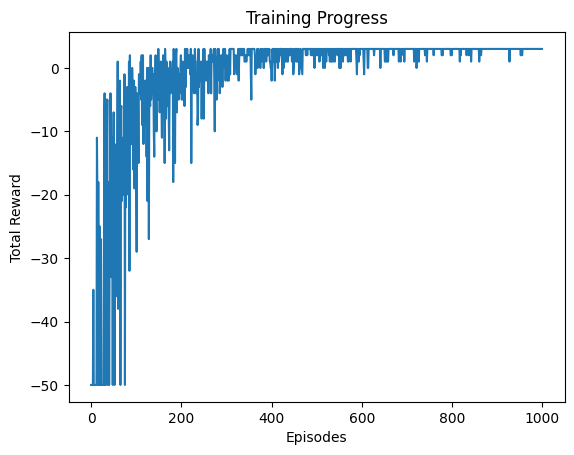

In [4]:
plt.plot(rewards_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()


In [5]:
def test_agent(env, q_table, num_trials=5):
    for trial in range(num_trials):
        state = env.reset()
        done = False
        print(f"Trial {trial+1}:")

        while not done:
            env.render()
            action = np.argmax(q_table[state[0], state[1], :])  # Best action
            state, _, done, _ = env.step(action)

        print("\nGoal Reached!\n")

test_agent(env, q_table)


         
  X   X  
         
  X   X A
        G

Goal Reached!



In [6]:
alpha = 0.2  # Increase learning rate
gamma = 0.95  # Increase future rewards consideration
epsilon_decay = 0.99  # Slower exploration decay


**Question 8**

In [1]:
!pip install opencv-python numpy joblib

In [2]:
import cv2
import numpy as np
import time
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


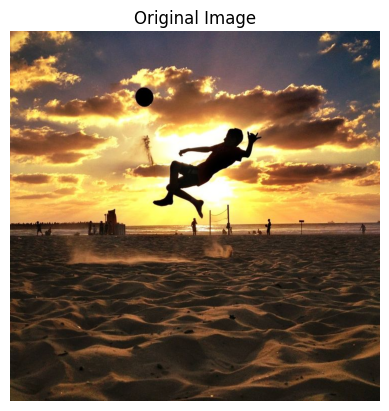

In [3]:
# Load the image
image_path = "/content/DSP-2.jpg"  # Change this to your image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Convert image to RGB for correct display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

In [4]:
# Define convolution kernels for different operations
blur_kernel = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)

edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], dtype=np.float32)


In [5]:
def apply_filter(image, kernel):
    """Applies a convolution filter to the image."""
    return cv2.filter2D(image, -1, kernel)


In [6]:
start_time = time.time()

# Apply filters sequentially
blurred_seq = apply_filter(image, blur_kernel)
sharpened_seq = apply_filter(image, sharpen_kernel)
edges_seq = apply_filter(image, edge_kernel)

end_time = time.time()
print(f"Sequential Execution Time: {end_time - start_time:.4f} sec")


Sequential Execution Time: 0.0527 sec


In [7]:
start_time = time.time()

# Apply filters in parallel
blurred, sharpened, edges = Parallel(n_jobs=-1)(
    delayed(apply_filter)(image, kernel) for kernel in [blur_kernel, sharpen_kernel, edge_kernel]
)

end_time = time.time()
print(f"Parallel Execution Time: {end_time - start_time:.4f} sec")


Parallel Execution Time: 1.8149 sec


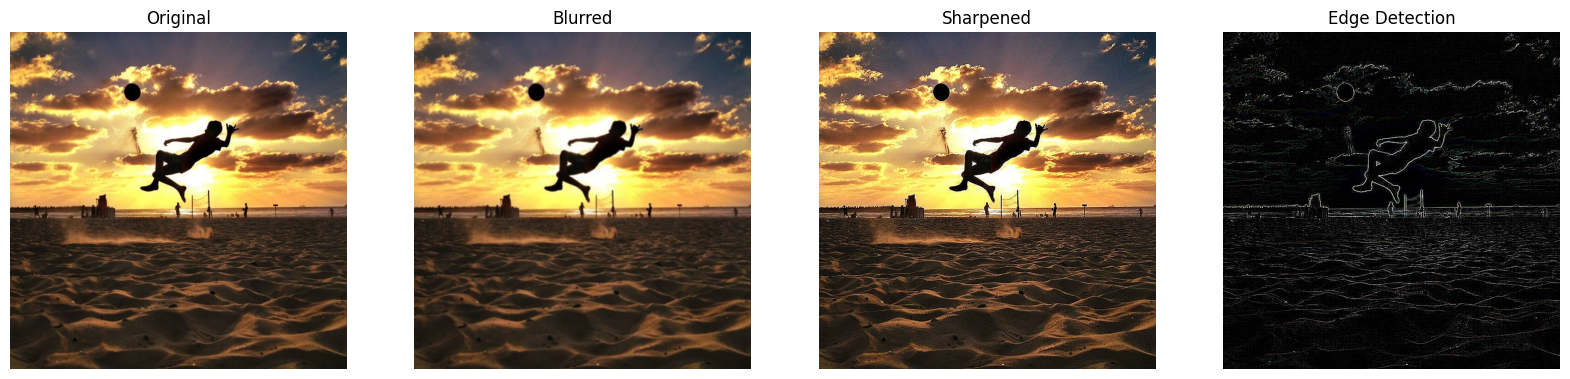

In [8]:
# Convert images to RGB for correct display in Matplotlib
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original")
axes[1].imshow(blurred_rgb)
axes[1].set_title("Blurred")
axes[2].imshow(sharpened_rgb)
axes[2].set_title("Sharpened")
axes[3].imshow(edges_rgb, cmap="gray")
axes[3].set_title("Edge Detection")

for ax in axes:
    ax.axis("off")

plt.show()


In [ ]:
cv2.imwrite("blurred.jpg", blurred)
cv2.imwrite("sharpened.jpg", sharpened)
cv2.imwrite("edge_detected.jpg", edges)
print("Processed images saved successfully!")

**Question 9**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [10]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Display first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
def apply_dim_reduction(method, X, components):
    """Applies a dimensionality reduction technique to reduce features."""
    model = method(n_components=components)
    X_reduced = model.fit_transform(X, y) if method == LDA else model.fit_transform(X)
    return X_reduced, model


In [14]:
# Reduce to 2D
X_pca_2, pca_2 = apply_dim_reduction(PCA, X_scaled, 2)
X_lda_2, lda_2 = apply_dim_reduction(LDA, X_scaled, 2)  # ✅ LDA works here
X_tsne_2, tsne_2 = apply_dim_reduction(TSNE, X_scaled, 2)
X_svd_2, svd_2 = apply_dim_reduction(TruncatedSVD, X_scaled, 2)

# Reduce to 3D (❌ Remove LDA)
X_pca_3, pca_3 = apply_dim_reduction(PCA, X_scaled, 3)
X_tsne_3, tsne_3 = apply_dim_reduction(TSNE, X_scaled, 3)
X_svd_3, svd_3 = apply_dim_reduction(TruncatedSVD, X_scaled, 3)


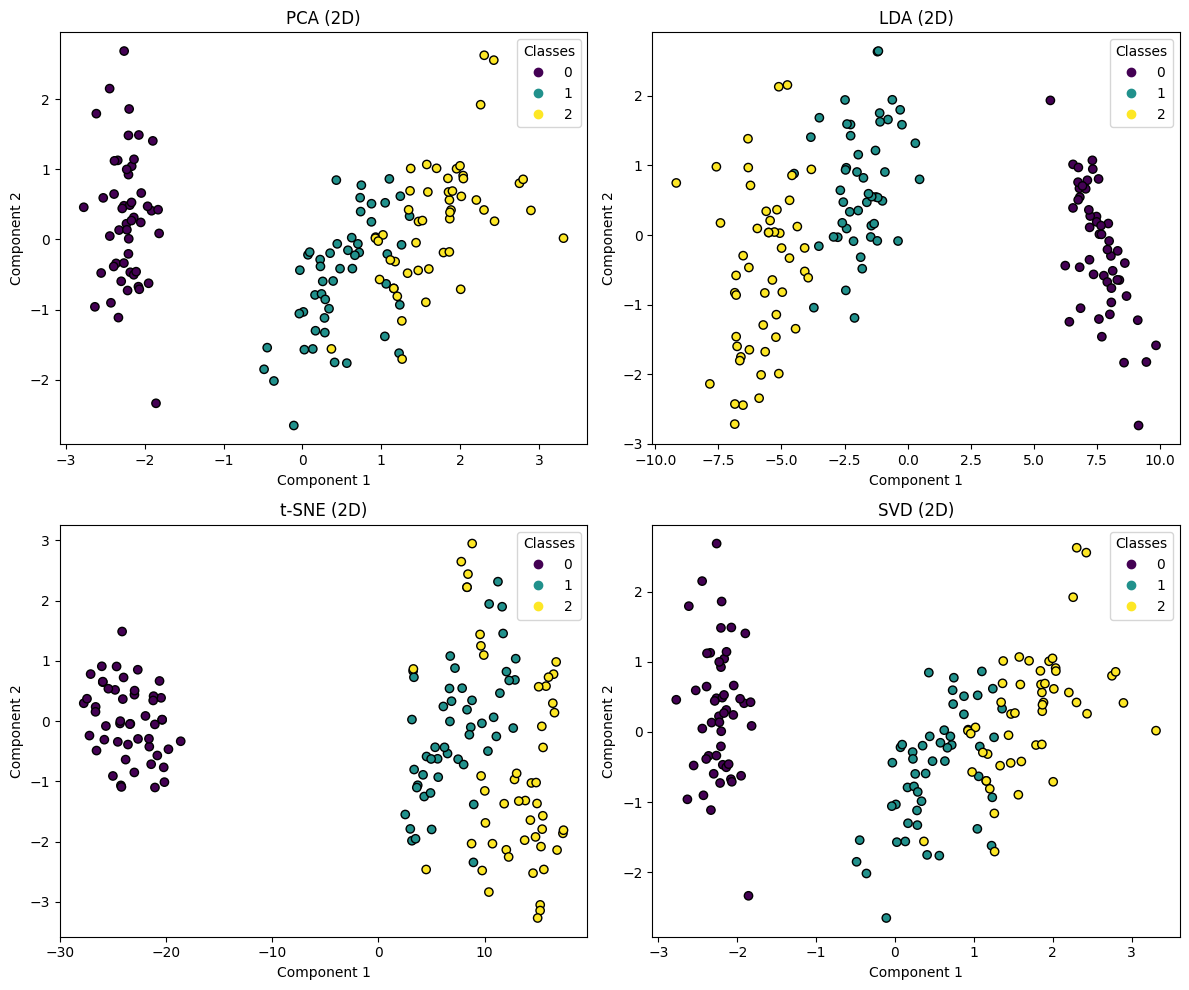

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (X_reduced, title) in zip(axes.ravel(),
                                  [(X_pca_2, "PCA"), (X_lda_2, "LDA"),
                                   (X_tsne_2, "t-SNE"), (X_svd_2, "SVD")]):
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="viridis", edgecolor='k')
    ax.set_title(f"{title} (2D)")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()


In [16]:
def evaluate_model(X_transformed, y):
    """Evaluates a classifier using cross-validation."""
    model = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_transformed, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Evaluate 2D features
pca_2_score = evaluate_model(X_pca_2, y)
lda_2_score = evaluate_model(X_lda_2, y)
tsne_2_score = evaluate_model(X_tsne_2, y)
svd_2_score = evaluate_model(X_svd_2, y)

# Evaluate 3D features
pca_3_score = evaluate_model(X_pca_3, y)
tsne_3_score = evaluate_model(X_tsne_3, y)
svd_3_score = evaluate_model(X_svd_3, y)


In [17]:
# Print Accuracy Scores
print("\nFeature Reduction to 2D:")
print(f"PCA:   {pca_2_score[0]:.4f} ± {pca_2_score[1]:.4f}")
print(f"LDA:   {lda_2_score[0]:.4f} ± {lda_2_score[1]:.4f}")
print(f"t-SNE: {tsne_2_score[0]:.4f} ± {tsne_2_score[1]:.4f}")
print(f"SVD:   {svd_2_score[0]:.4f} ± {svd_2_score[1]:.4f}")

print("\nFeature Reduction to 3D:")
print(f"PCA:   {pca_3_score[0]:.4f} ± {pca_3_score[1]:.4f}")
print(f"t-SNE: {tsne_3_score[0]:.4f} ± {tsne_3_score[1]:.4f}")
print(f"SVD:   {svd_3_score[0]:.4f} ± {svd_3_score[1]:.4f}")



Feature Reduction to 2D:
PCA:   0.8800 ± 0.0859
LDA:   0.9733 ± 0.0389
t-SNE: 0.9200 ± 0.0806
SVD:   0.8800 ± 0.0859

Feature Reduction to 3D:
PCA:   0.9333 ± 0.0699
t-SNE: 0.8800 ± 0.0267
SVD:   0.9333 ± 0.0699


**Question 12**

In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist

def k_means(data, k, max_iter=100):
    np.random.seed(42)
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]

    for _ in range(max_iter):
        labels = pairwise_distances_argmin(data, centroids)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

def k_medoids(data, k, max_iter=100):
    np.random.seed(42)
    medoids = data[np.random.choice(range(len(data)), k, replace=False)]

    for _ in range(max_iter):
        distances = cdist(data, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        new_medoids = np.array([data[labels == i][np.argmin(cdist([medoids[i]], data[labels == i], metric='euclidean').sum(axis=1))] for i in range(k)])

        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

def fuzzy_c_means(data, k, m=2, max_iter=100, epsilon=1e-5):
    np.random.seed(42)
    n_samples, n_features = data.shape
    u = np.random.rand(n_samples, k)
    u = u / np.sum(u, axis=1, keepdims=True)

    for _ in range(max_iter):
        centroids = np.dot(u.T ** m, data) / np.sum(u.T ** m, axis=1, keepdims=True)
        distances = cdist(data, centroids, metric='euclidean')
        new_u = 1 / (distances ** (2 / (m - 1)) + 1e-10)
        new_u = new_u / np.sum(new_u, axis=1, keepdims=True)

        if np.linalg.norm(new_u - u) < epsilon:
            break
        u = new_u

    return u, centroids

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Generate synthetic dataset
    data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # K-means
    kmeans_labels, kmeans_centroids = k_means(data, k=3)
    print("K-means Centroids:\n", kmeans_centroids)

    # K-medoids
    kmedoids_labels, kmedoids_medoids = k_medoids(data, k=3)
    print("K-medoids Medoids:\n", kmedoids_medoids)

    # Fuzzy C-means
    fuzzy_membership, fuzzy_centroids = fuzzy_c_means(data, k=3)
    print("Fuzzy C-means Centroids:\n", fuzzy_centroids)

K-means Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
K-medoids Medoids:
 [[-1.68665271  7.79344248]
 [-7.33898809 -7.72995396]
 [ 4.42219763  3.07194654]]
Fuzzy C-means Centroids:
 [[-2.63468297  9.04171187]
 [-6.89083823 -6.99495237]
 [ 4.7557504   2.00113144]]


**Question 13**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler

In [36]:
# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Get all classifiers from sklearn
estimators = all_estimators(type_filter='classifier')
results = []

In [38]:
# Train and evaluate all classifiers
for name, Classifier in estimators:
    try:
        model = Classifier()
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        results.append((name, mean_score))
    except Exception as e:
        continue

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [39]:
# Sort classifiers based on accuracy
results.sort(key=lambda x: x[1], reverse=True)

In [40]:
# Select top 4 classifiers
top_classifiers = results[:4]
print("Top 4 classifiers:")
for name, score in top_classifiers:
    print(f"{name}: {score:.4f}")



Top 4 classifiers:
LinearDiscriminantAnalysis: 0.9750
QuadraticDiscriminantAnalysis: 0.9667
LogisticRegression: 0.9583
LogisticRegressionCV: 0.9583


In [41]:
# Instantiate top 4 classifiers
best_models = {name: all_estimators(type_filter='classifier')[i][1]() for i, (name, _) in enumerate(top_classifiers)}


In [43]:
# Ensemble methods with corrected parameter names
bagging = BaggingClassifier(estimator=best_models[top_classifiers[0][0]], n_estimators=10, random_state=42)
boosting = AdaBoostClassifier(estimator=best_models[top_classifiers[1][0]], n_estimators=50, random_state=42)
stacking = StackingClassifier(estimators=[(name, model) for name, model in best_models.items()], final_estimator=best_models[top_classifiers[2][0]])

ensemble_models = {'Bagging': bagging, 'Boosting': boosting, 'Stacking': stacking}


In [45]:
# Evaluate ensemble models
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classifier Report:")
    print(classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:610: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight


Bagging Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Boosting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Stacking Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88